In [1]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import Draw
from accfg import AccFG
import pandas as pd
from collections import Counter
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

tqdm.pandas()

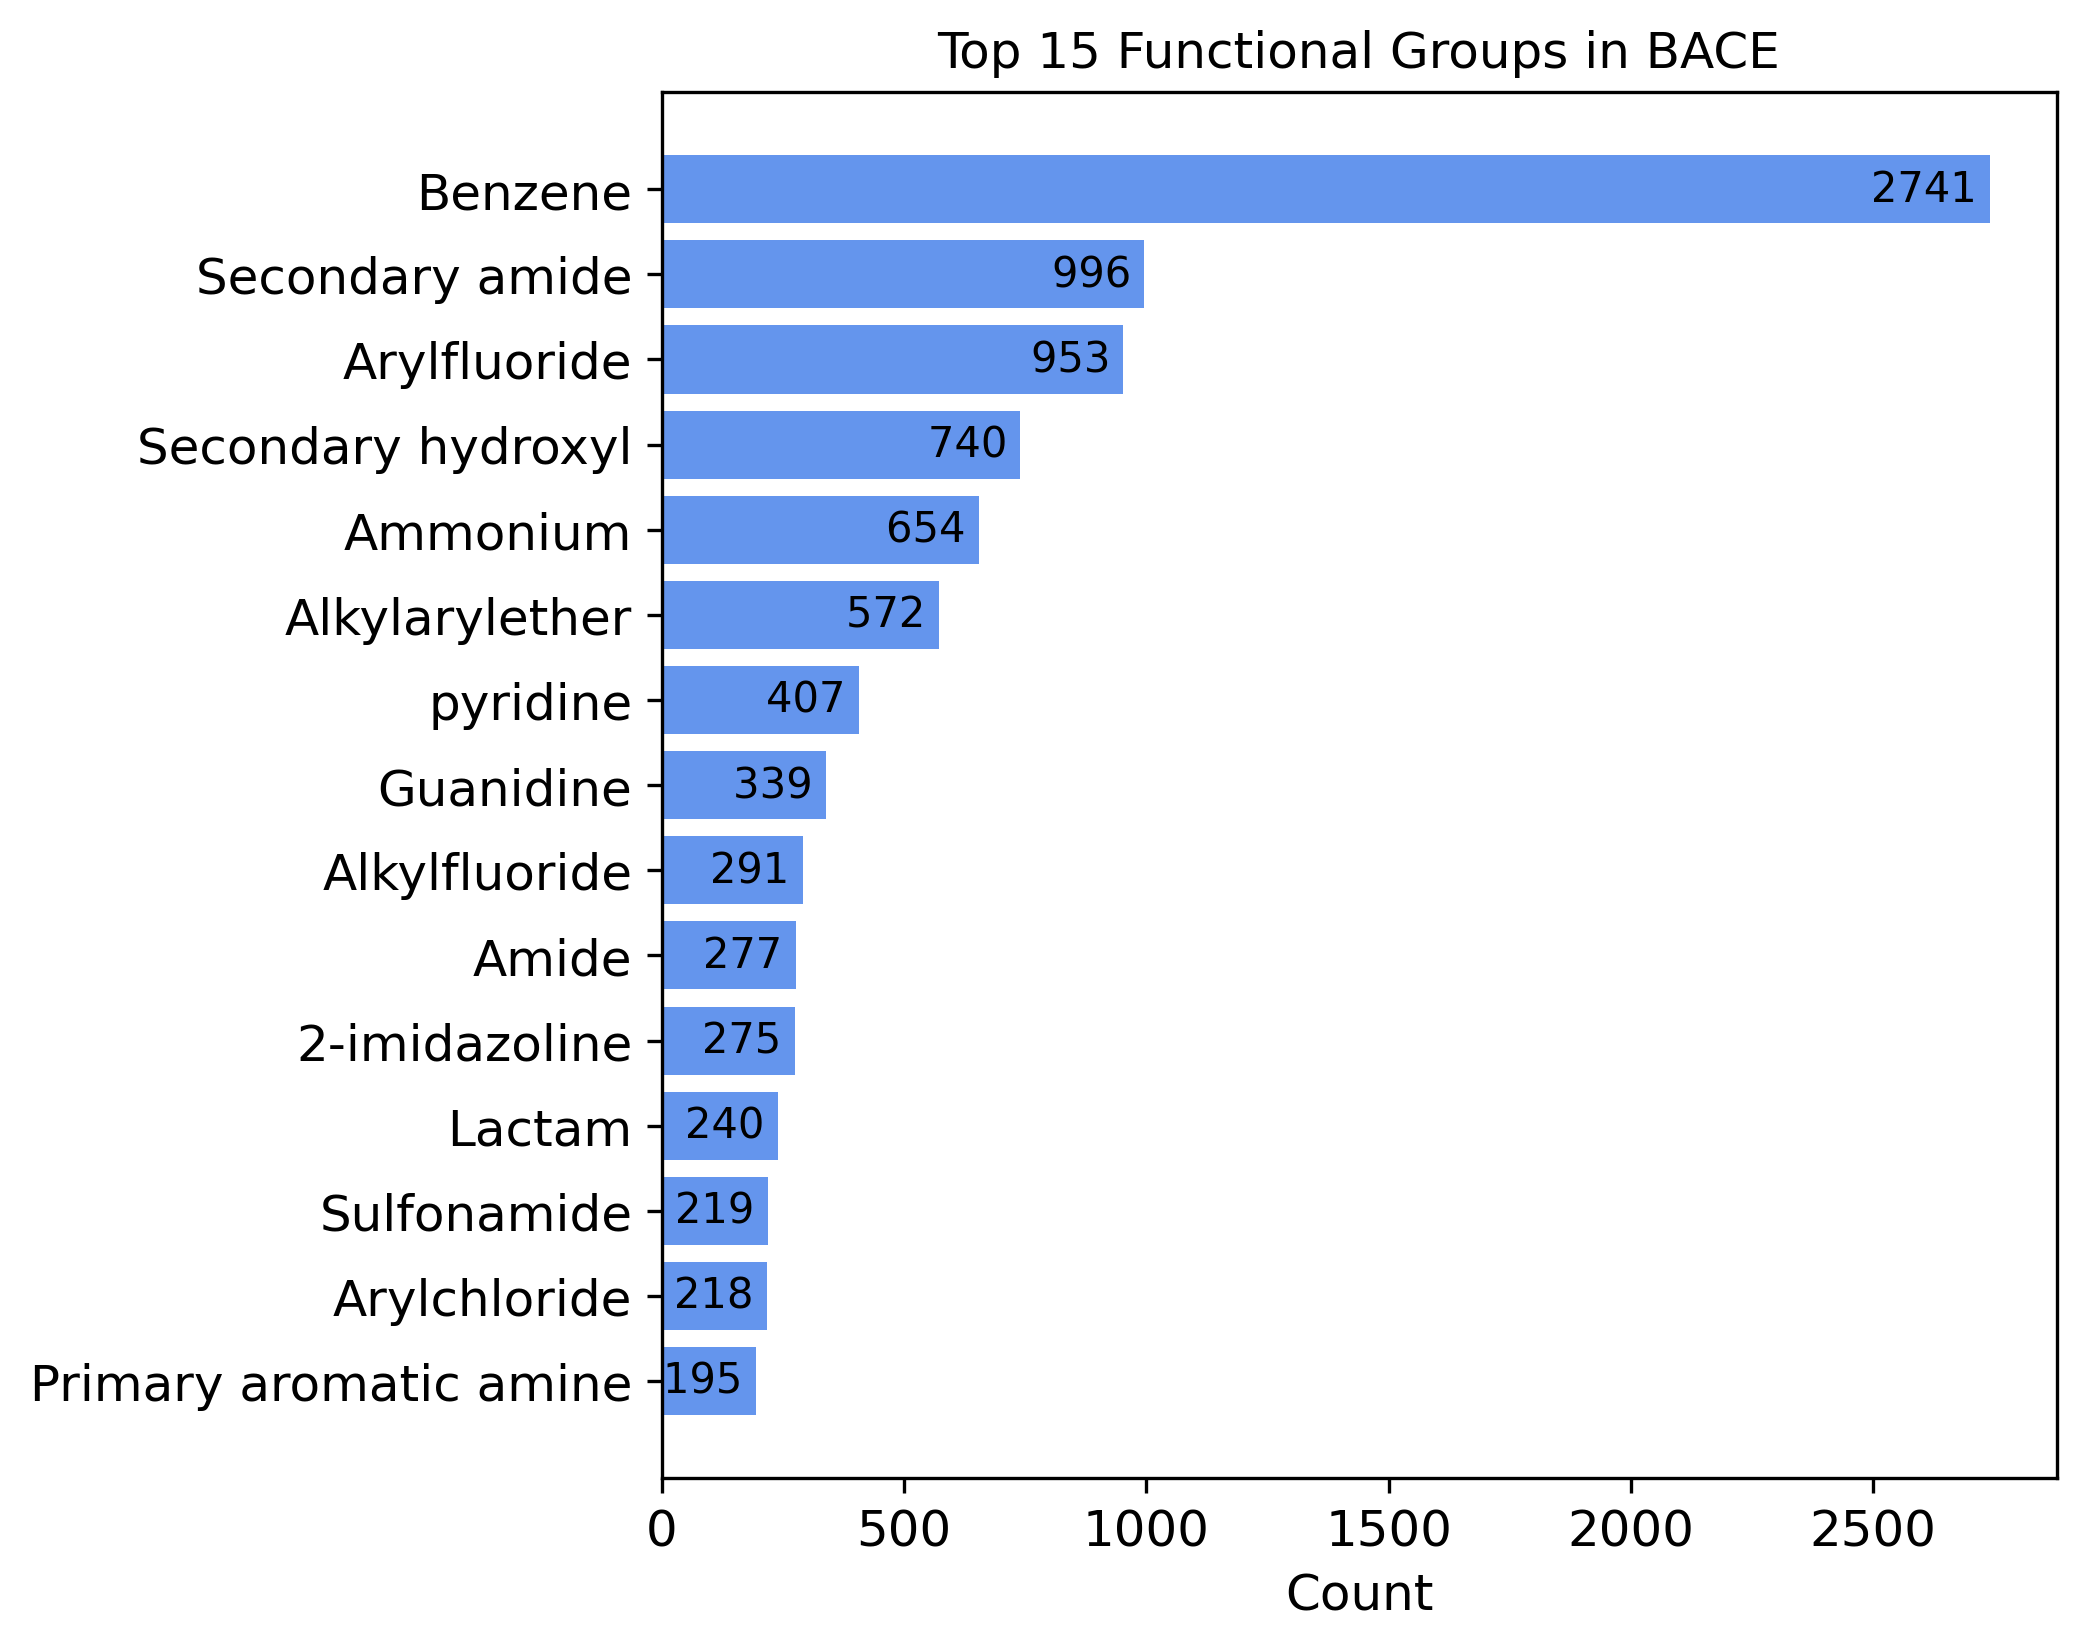

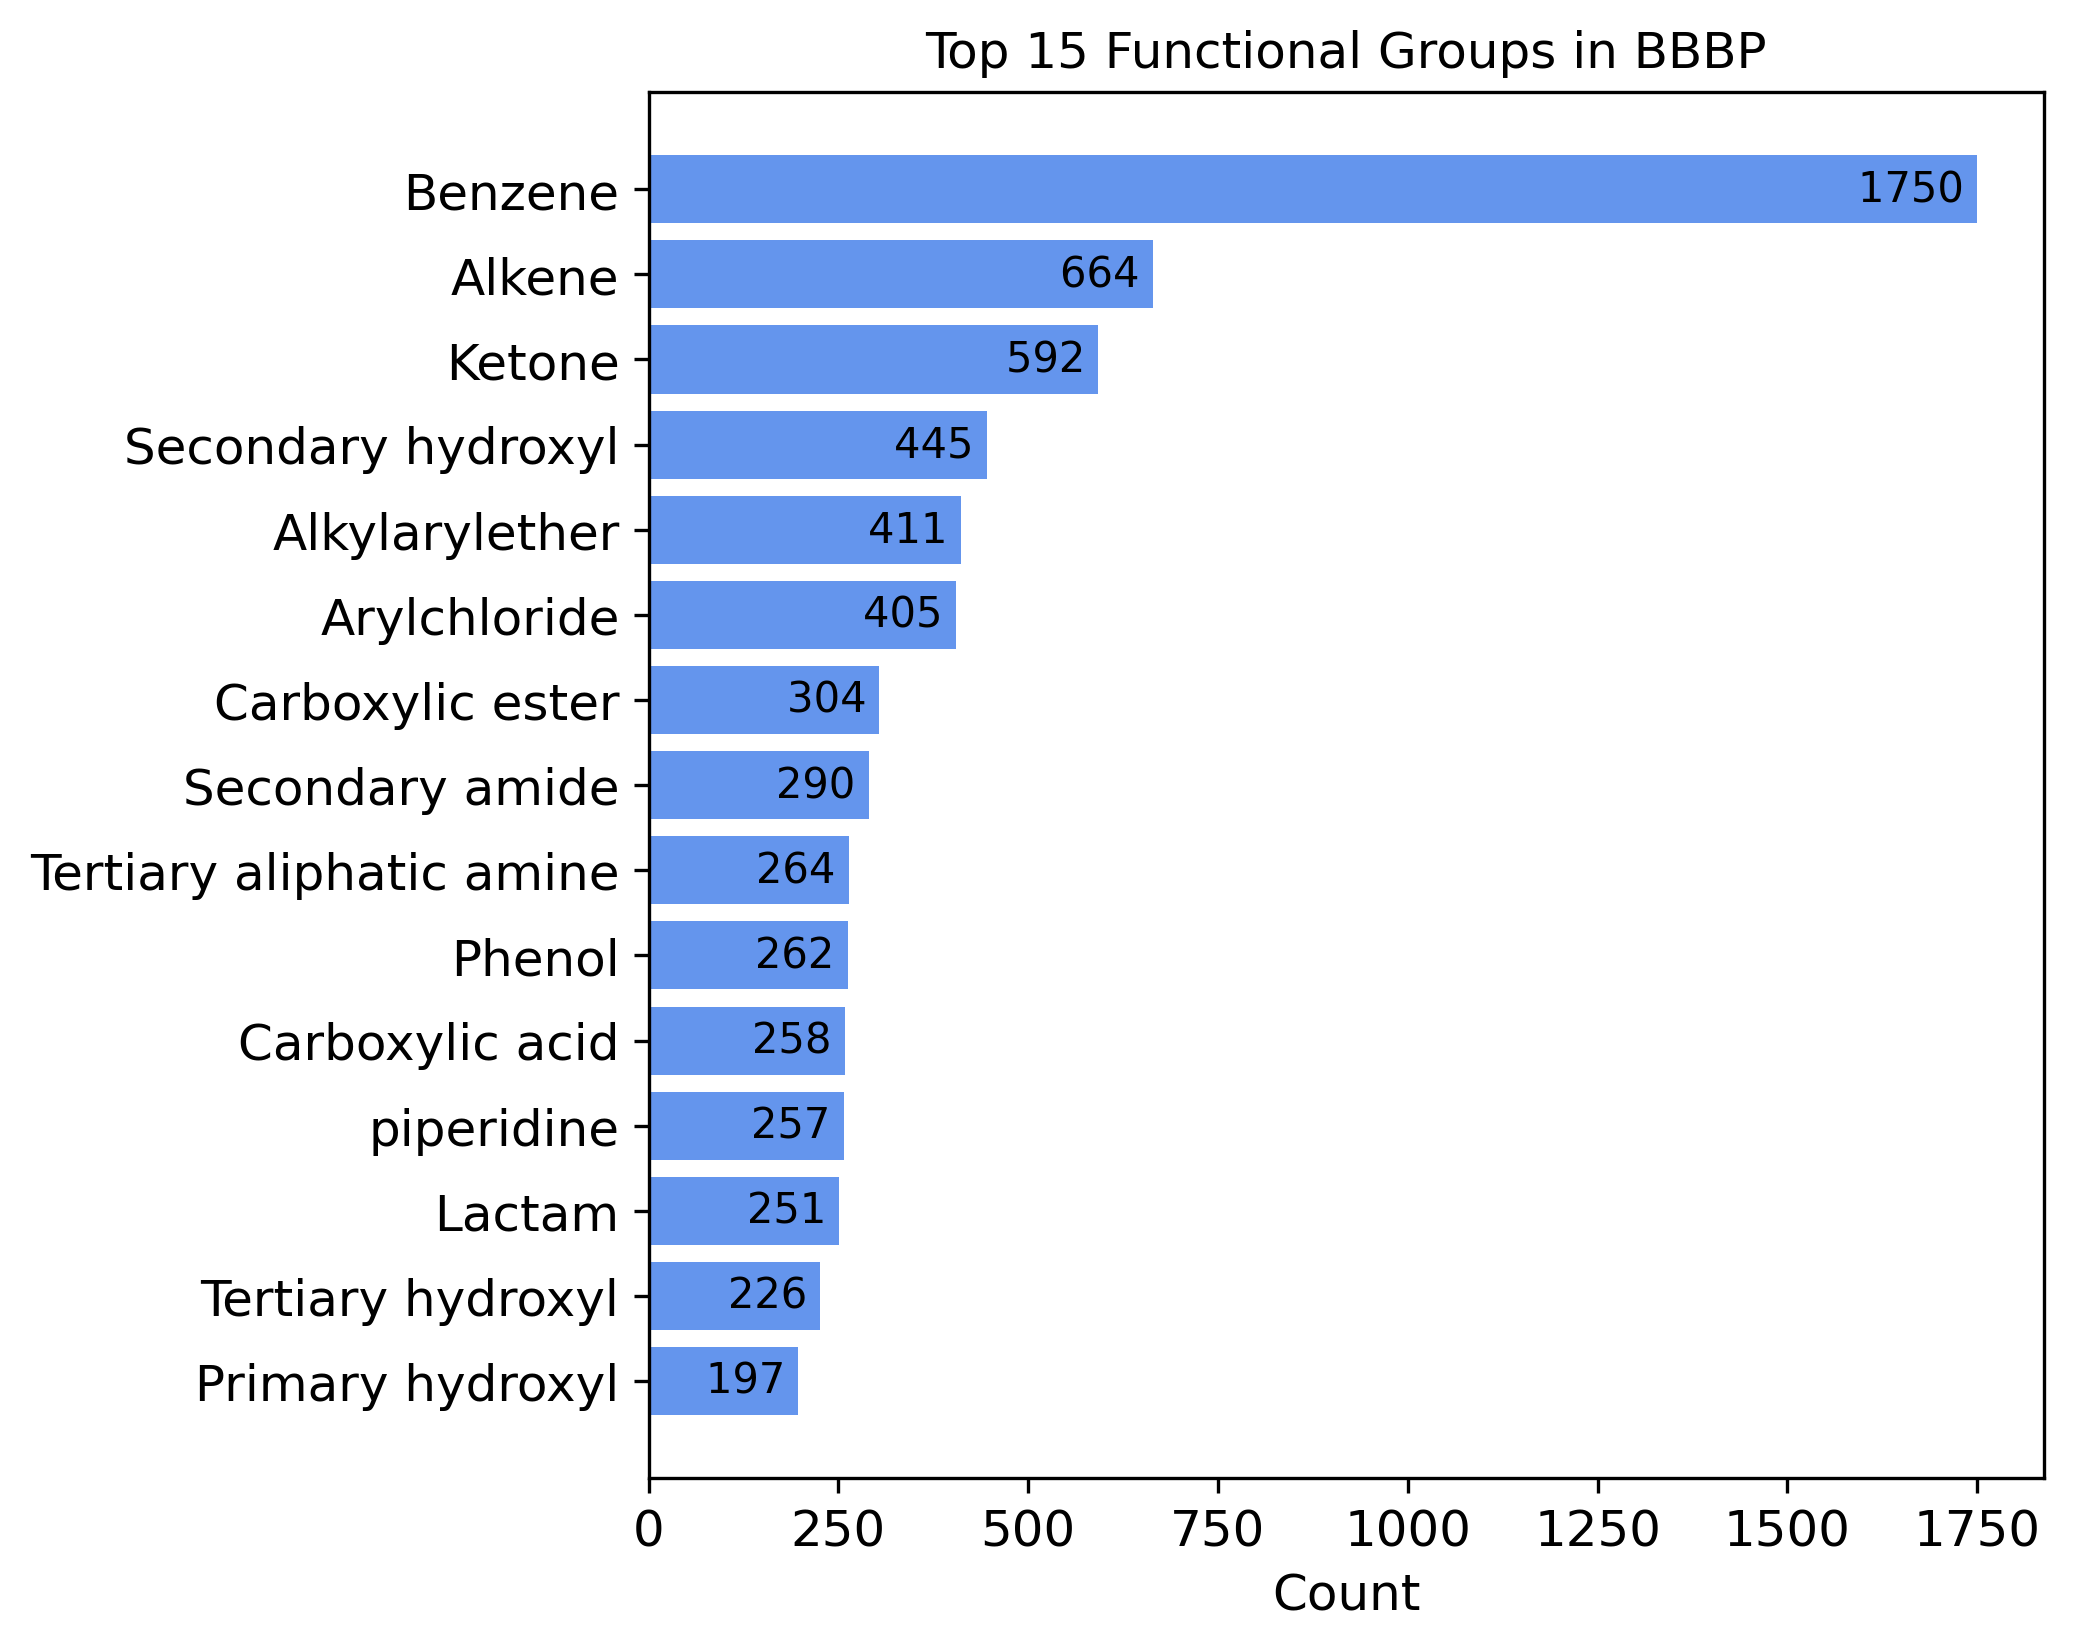

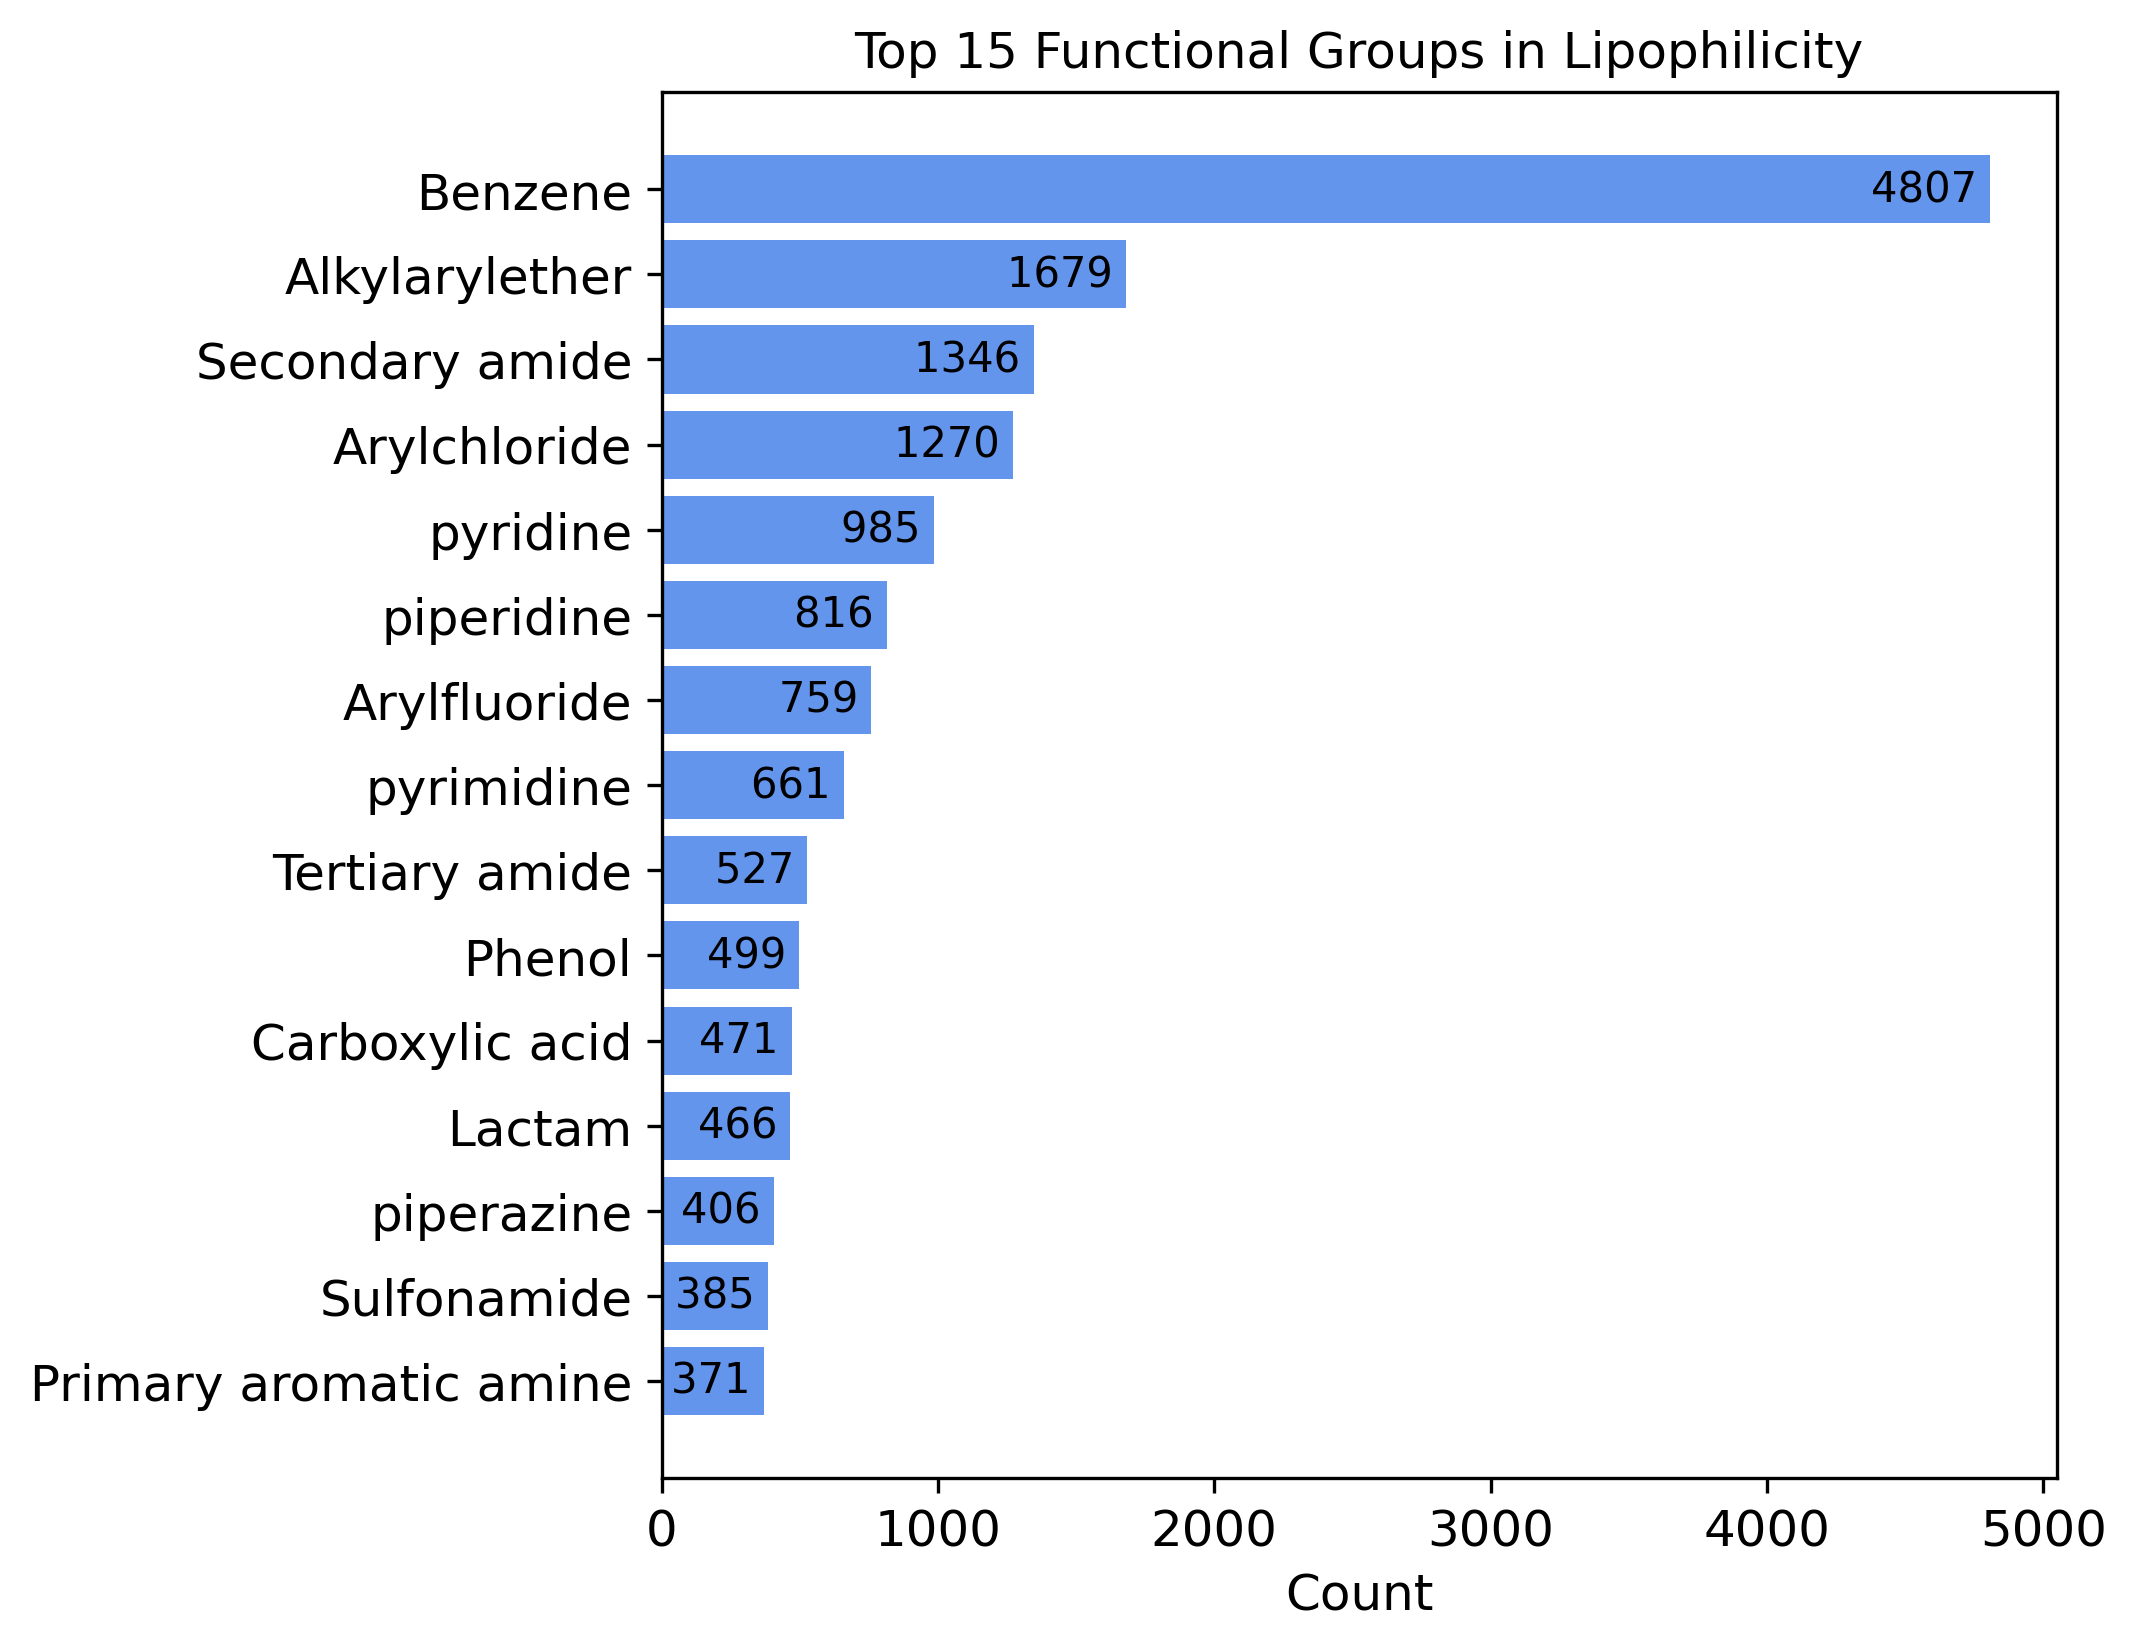

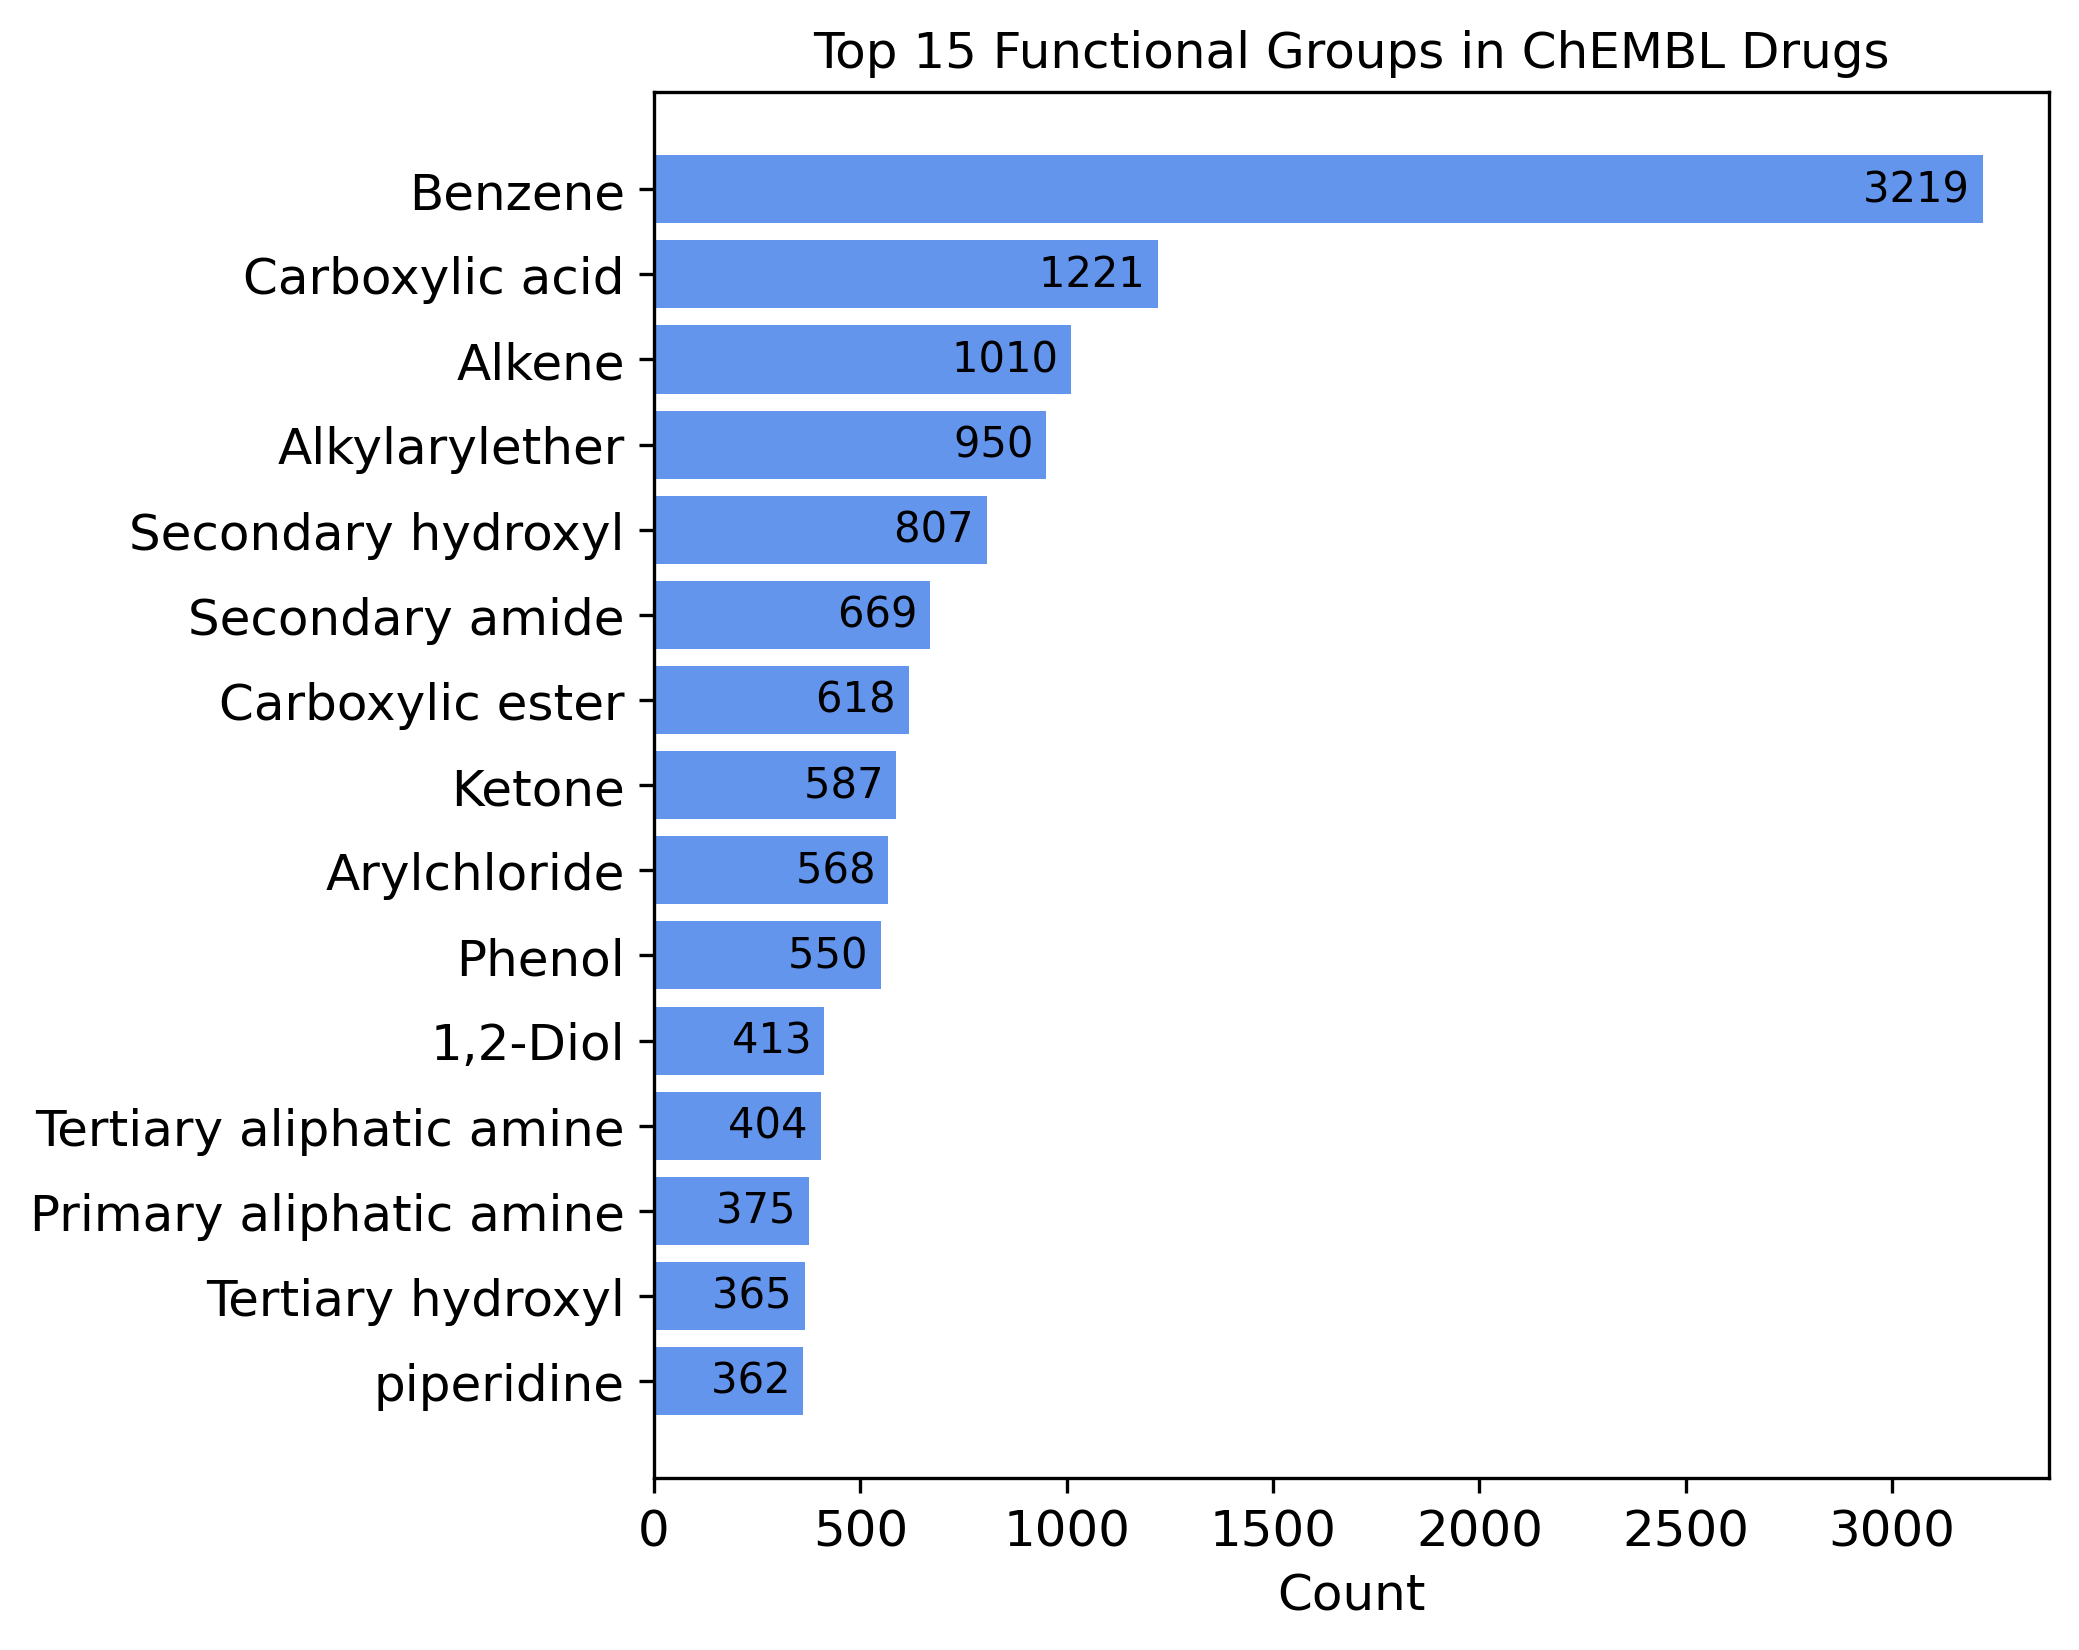

In [2]:
def plot_top_fgs(path, top_n=15, name=None, img_save_path=None):
    df = pd.read_csv(path)
    df['fgs'] = df['fgs'].apply(eval)
    fgs_counter = Counter()
    for fgs in df['fgs']:
        fgs_dict = {k: len(v) for k, v in fgs.items()}
        fgs_counter.update(fgs_dict)
    top_fgs = fgs_counter.most_common(top_n)

    # Separate the functional groups and their counts
    fgs, counts = zip(*top_fgs)

    # Plot the data
    plt.figure(dpi=300, figsize=(6, 6))  # Set dpi to 300 for higher resolution and adjust figure size
    plt.barh(fgs, counts, color='cornflowerblue')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Count',fontsize=12)
    # plt.ylabel('Functional Group')
    plt.title(f'Top {top_n} Functional Groups in {name}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    for index, value in enumerate(counts):
        plt.text(value, index, str(value)+' ', va='center', ha='right')
    if img_save_path is not None: 
        plt.savefig(img_save_path, bbox_inches='tight', dpi=300)
    return None

path_list = [
    'molecule_data/bace_fgs.csv',
    'molecule_data/BBBP_fgs.csv',
    'molecule_data/Lipophilicity_fgs.csv',
    'molecule_data/chembl_approved_sm_fgs.csv'
]

output_path_list = [
    'results/bace_fgs_plot.png',
    'results/BBBP_fgs_plot.png',
    'results/Lipophilicity_fgs_plot.png',
    'results/chembl_approved_sm_fgs_plot.png'
]
name_list = [
    'BACE',
    'BBBP',
    'Lipophilicity',
    'ChEMBL Drugs']

for path, output_path, name in zip(path_list, output_path_list, name_list):
    plot_top_fgs(path, top_n=15, name=name, img_save_path=output_path)
    